<a href="https://colab.research.google.com/github/sriramreddy-7/Statistical-Machine-Learning/blob/main/GPPRF_SRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [4]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

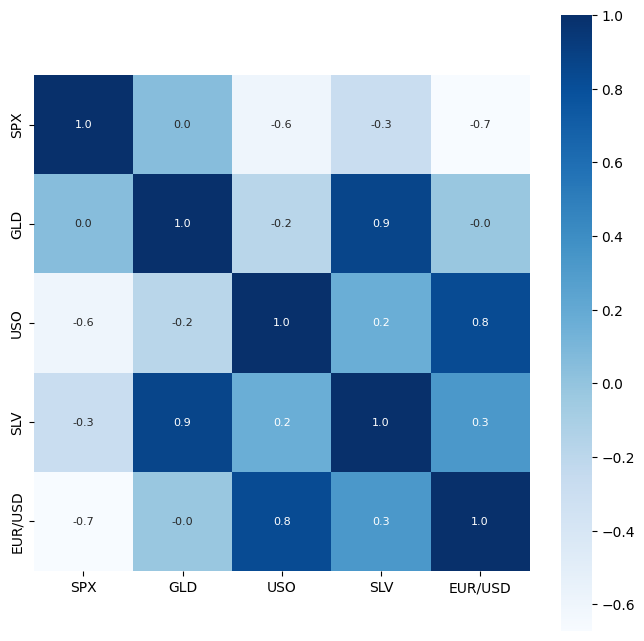

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

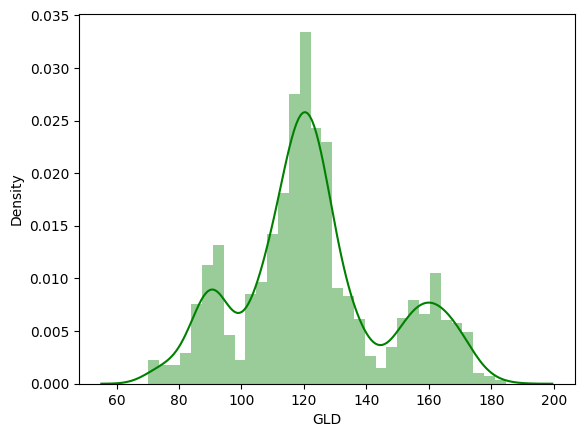

In [16]:
sns.distplot(gold_data['GLD'],color='green')

In [27]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [18]:
print(X,Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [54]:
regressor = RandomForestRegressor(n_estimators=100)


In [55]:
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [56]:
test_data_prediction = regressor.predict(X_test)

In [57]:
print(test_data_prediction)

[122.65229968 130.48410235 127.54809981  97.69969929 119.33410011
 114.57139918 124.94300128 117.8223998  108.02210121  99.15209948
  95.77860008 167.59269824 149.61890178 116.14490085 170.86450107
  85.48949901 124.25539912 108.94829726 112.35620076 131.588003
 124.19209949 113.50370089 116.06930032 108.69419943 108.03380006
 125.81100013 119.31699954 112.51619928 113.2733019  126.15189885
 146.02000172  89.10949979 167.97659923 113.58959939 108.30030082
 120.01040111 141.39899794 161.0059011  173.39199901 153.08130106
 119.94530079 111.39230068 121.35299978 113.79519952 122.02869996
 108.05630096  88.11709929 114.17399936 129.92480274 117.89610117
 104.66499977 130.13980297 107.38439789 160.36480525 131.53550057
 117.68399949 147.01520047 136.13120201  95.42230066 124.70430105
 114.31779936  86.56100079 104.29379914 114.12830094  83.9761991
 122.40960034 116.63439892 113.53640198 165.95310268  92.27660087
  79.95060097 161.0187013  158.32420193 107.07829977 148.29460222
 110.06799785

In [58]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.990165943993749


In [59]:
Y_test = list(Y_test)

In [60]:
print(Y_test)

[122.32, 129.899994, 126.980003, 96.5, 117.580002, 115.0, 125.440002, 116.93, 108.220001, 98.830002, 96.910004, 168.789993, 151.029999, 115.839996, 169.809998, 85.129997, 122.639999, 107.849998, 110.449997, 131.240005, 124.940002, 115.379997, 116.650002, 109.25, 110.529999, 125.720001, 123.709999, 114.949997, 114.290001, 126.860001, 146.869995, 89.440002, 167.270004, 115.050003, 117.110001, 120.620003, 141.630005, 160.649994, 173.309998, 152.300003, 117.459999, 113.150002, 121.309998, 113.470001, 121.349998, 107.519997, 88.839996, 114.440002, 130.559998, 117.739998, 99.669998, 129.770004, 106.169998, 161.070007, 127.93, 115.940002, 143.470001, 130.110001, 95.730003, 124.360001, 116.620003, 85.599998, 104.099998, 112.610001, 86.519997, 122.400002, 116.470001, 112.660004, 166.399994, 91.989998, 80.809998, 160.559998, 157.639999, 103.419998, 135.020004, 110.400002, 124.43, 127.739998, 112.440002, 119.910004, 137.809998, 105.720001, 93.559998, 92.730003, 111.510002, 119.580002, 109.980003,

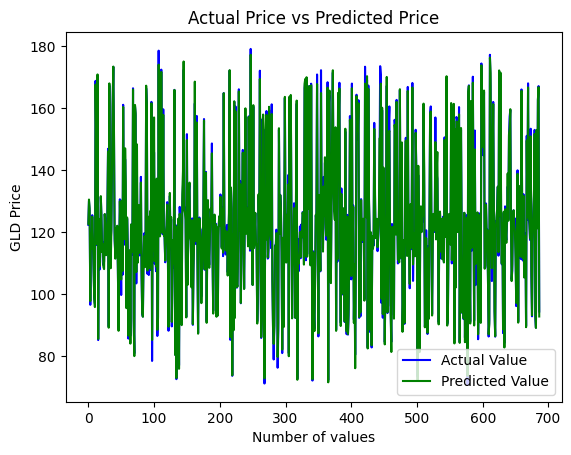

In [61]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [62]:
mse = mean_squared_error(Y_test, test_data_prediction)

print("Mean Squared Error:", mse)

Mean Squared Error: 5.4186868056058435
